### Load Data

In [3773]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV




In [3670]:
# Read in data
train = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_train.csv')
test = pd.read_csv('/users/monicalondon/Downloads/8855_12352_bundle_archive/housing_test.csv')

In [3671]:
# Combine data
frames = [train, test]
data = pd.concat(frames)


### Preview data

In [3672]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [3673]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

### Clean data

In [3674]:
# Drop unnecessary columns or columns with too few values
cols_to_drop = ['Id', 'Alley', 'PoolQC', 'MiscFeature', 'Fence', 'MiscVal', 'FireplaceQu', 'GarageYrBlt', 'PoolArea']
def drop_unnecessary_cols(data=data, cols_to_drop=cols_to_drop):
    for i in cols_to_drop:
        data.drop([i], axis=1, inplace=True)
    return data

drop_unnecessary_cols()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,2,2008,WD,Normal,208500.0
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,5,2007,WD,Normal,181500.0
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,9,2008,WD,Normal,223500.0
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,2,2006,WD,Abnorml,140000.0
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,6,2006,WD,Normal,NaN
1455,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,CarPort,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,4,2006,WD,Abnorml,NaN
1456,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,Detchd,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,9,2006,WD,Abnorml,NaN
1457,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,7,2006,WD,Normal,NaN


In [3675]:
# Drop values with no sale price
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   LotShape       2919 non-null   object 
 6   LandContour    2919 non-null   object 
 7   Utilities      2917 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

In [3676]:
data['SalePrice'].replace('', np.nan, inplace=True)
data.dropna(subset=['SalePrice'], inplace=True)

#### Deal with missing values

In [3677]:
# Which columns have missing values?
[col for col in data.columns if data[col].isnull().any()]

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [3678]:
data['LotFrontage'] = data.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [3679]:
# LotFrontage- fill missing LotFrontage values based on median LotArea/LotFrontage value
#data['LotFrontage'] = data['LotFrontage'].fillna((data['LotArea']/data['LotFrontage']).median())

In [3680]:
# MasVnrType
print(data['MasVnrType'].value_counts())
# Fill missing MasVnrType values with None (mode)
data['MasVnrType'] = data['MasVnrType'].fillna('None')

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64


In [3681]:
# MasVnrArea
print(data['MasVnrArea'].value_counts())
# Fill missing MasVnrArea values with 0 (mode)
data['MasVnrArea'] = data['MasVnrArea'].fillna(0.0)

0.0      861
72.0       8
180.0      8
108.0      8
120.0      7
        ... 
651.0      1
337.0      1
415.0      1
293.0      1
621.0      1
Name: MasVnrArea, Length: 327, dtype: int64


In [3682]:
# BsmtQual- there are only 37 missing values
print(len(data) - sum(data['BsmtQual'].value_counts()))
# Fill missing BsmtQual with None, assuming it is empty because there is no basement
data['BsmtQual'] = data['BsmtQual'].fillna('None')

37


In [3683]:
# BsmtCond - also only 37 missing values
print(len(data) - sum(data['BsmtCond'].value_counts()))
# Fill missing BsmtCond with None, assuming it is empty because there is no basement
data['BsmtCond'] = data['BsmtCond'].fillna('None')

37


In [3684]:
# BsmtExposure - only 38 missing values
print(len(data) - sum(data['BsmtExposure'].value_counts()))
# Fill missing BsmtExposure with None
data['BsmtExposure'] = data['BsmtExposure'].fillna('None')

38


In [3685]:
# BsmtFinType1 - only 38 missing values
print(len(data) - sum(data['BsmtFinType1'].value_counts()))
# Fill missing BsmtFinType1 with None
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('None')

37


In [3686]:
# BsmtFinType2 - only 38 missing values
print(len(data) - sum(data['BsmtFinType2'].value_counts()))
# Fill missing BsmtFinType2 with None
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('None')

38


In [3687]:
# Electrical - just 1 missing value
# Fill missing Electrical value with mode (SBrkr)
print(data['Electrical'].value_counts())
print(len(data) - sum(data['Electrical'].value_counts()))
data['Electrical'] = data['Electrical'].fillna('SBrkr')

SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64
1


In [3688]:
# Change electrical to binary- 1 if SBrkr else 0
data['Electrical'] = np.where((data.Electrical == 'SBrkr'), 1,data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'FuseF'), 0,data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'FuseA'), 0,data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'FuseP'), 0,data.Electrical)
data['Electrical'] = np.where((data.Electrical == 'Mix'), 0,data.Electrical)

In [3689]:
# Change electrical type to Int64
data['Electrical'] = data['Electrical'].astype('int64', copy=False)

In [3690]:
# Change Street to binary - 1 if Paved else 0 
data['Street'] = np.where((data.Street == 'Pave'), 1,data.Street)
data['Street'] = np.where((data.Street == 'Grvl'), 0,data.Street)

In [3691]:
# Change Street type to int64
data['Street'] = data['Street'].astype('int64', copy=False)

In [3692]:
# GarageType - 81 missing values. It is reasonable to believe that these homes don't have garages
# Fill missing GarageType with None
print(len(data) - sum(data['GarageType'].value_counts()))
data['GarageType'] = data['GarageType'].fillna('None')

81


In [3693]:
# GarageQual - 81 missing values.
# Fill missing GarageQual with None
print(len(data) - sum(data['GarageQual'].value_counts()))
data['GarageQual'] = data['GarageQual'].fillna('None')

81


In [3694]:
# Fill missing GarageCond with None
print(len(data) - sum(data['GarageCond'].value_counts()))
data['GarageCond'] = data['GarageCond'].fillna('None')

81


In [3695]:
# Fill missing GarageFinish with None
print(len(data) - sum(data['GarageFinish'].value_counts()))
data['GarageFinish'] = data['GarageFinish'].fillna('None')

81


#### Change data types

In [3696]:
# Change these numbers to strings
data['MSSubClass'] = data['MSSubClass'].astype(str)
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [3697]:
# Change KitchenQual to numeric
data['KitchenQual'].unique()
data['KitchenQual'] = np.where((data.KitchenQual == 'Ex'), 5,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Gd'), 4,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'TA'), 3,data.KitchenQual)
data['KitchenQual'] = np.where((data.KitchenQual == 'Fa'), 2,data.KitchenQual)

In [3698]:
data['KitchenQual'] = data['KitchenQual'].astype('int64', copy=False)

In [3699]:
# Change ExterQual to numeric
data['ExterQual'] = np.where((data.ExterQual == 'Ex'), 5,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Gd'), 4,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'TA'), 3,data.ExterQual)
data['ExterQual'] = np.where((data.ExterQual == 'Fa'), 2,data.ExterQual)
data['ExterQual'] = data['ExterQual'].astype('int64', copy=False)

In [3700]:
# Change ExterCond to numeric
data['ExterCond'] = np.where((data.ExterCond == 'Ex'), 5,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Gd'), 4,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'TA'), 3,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Fa'), 2,data.ExterCond)
data['ExterCond'] = np.where((data.ExterCond == 'Po'), 1,data.ExterCond)
data['ExterCond'] = data['ExterCond'].astype('int64', copy=False)

### EDA

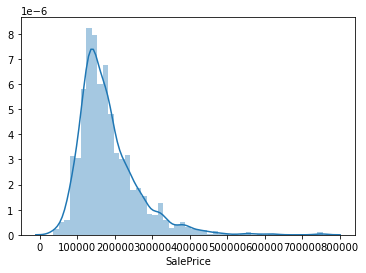

In [3701]:
sns.distplot(data['SalePrice']);

We can see that the Sale Price is not normally distributed, so we will need to do a log transformation

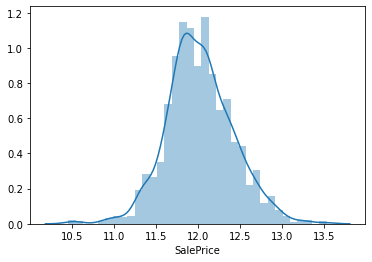

In [3702]:
sns.distplot(np.log1p(data['SalePrice']));

In [3703]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 1459
Data columns (total 72 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   object 
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1460 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   int64  
 5   LotShape       1460 non-null   object 
 6   LandContour    1460 non-null   object 
 7   Utilities      1460 non-null   object 
 8   LotConfig      1460 non-null   object 
 9   LandSlope      1460 non-null   object 
 10  Neighborhood   1460 non-null   object 
 11  Condition1     1460 non-null   object 
 12  Condition2     1460 non-null   object 
 13  BldgType       1460 non-null   object 
 14  HouseStyle     1460 non-null   object 
 15  OverallQual    1460 non-null   int64  
 16  OverallCond    1460 non-null   int64  
 17  YearBuilt      1460 non-null   int64  
 18  YearRemo

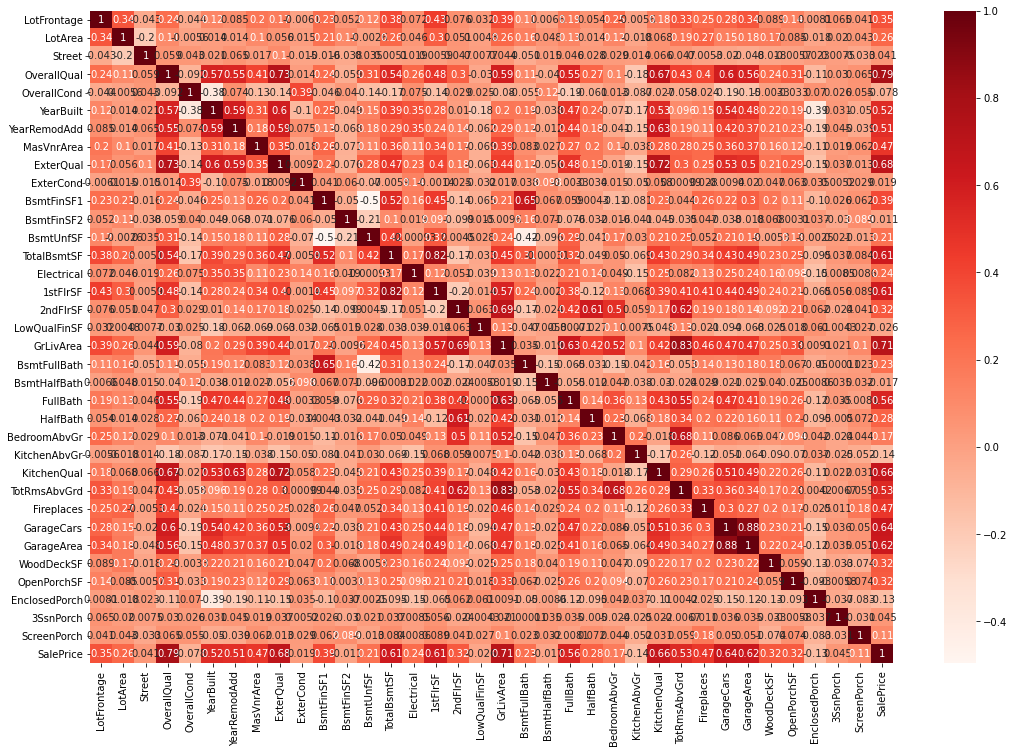

In [3704]:
# Plot heatmap of Pearson correlation
plt.figure(figsize = (18,12))
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()


We can see from the Correlation Heatmap that Garage Cars (0.64), Kitchen Qual (0.66), GrLivArea (0.71), ExterQual (0.68), and OverallQual (0.79) have the highest correlation to Sale Price.

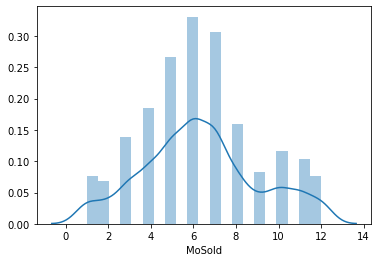

In [3705]:
# Distribution of months sold - we can see that summer months have the highest volume of sales
sns.distplot(data['MoSold']);

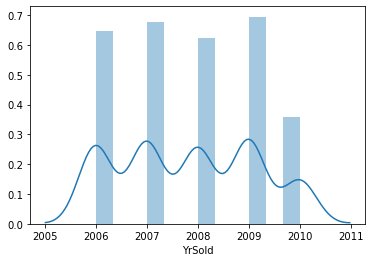

In [3706]:
# Distribution of Year Sold
sns.distplot(data['YrSold']);

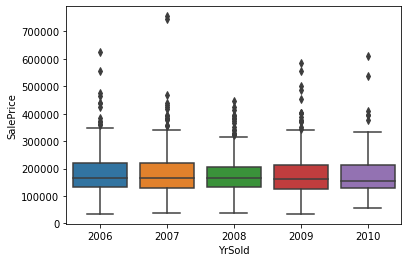

In [3707]:
# Boxplot of sale prices by year sold
sns.boxplot(x='YrSold', y='SalePrice', data=data)

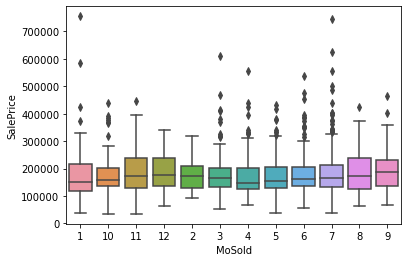

In [3708]:
sns.boxplot(x='MoSold', y='SalePrice', data=data)

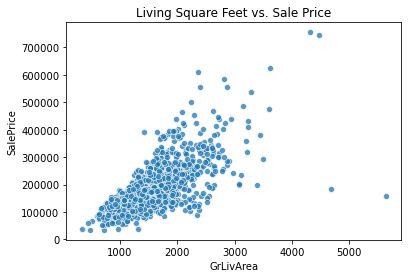

In [3709]:
# Living area vs Sale Price
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data, palette='colorblind', alpha=0.75)
plt.title('Living Square Feet vs. Sale Price');

As expected, there is a clear positive correlation between GrLivArea, which represents square footage, and the sale price.

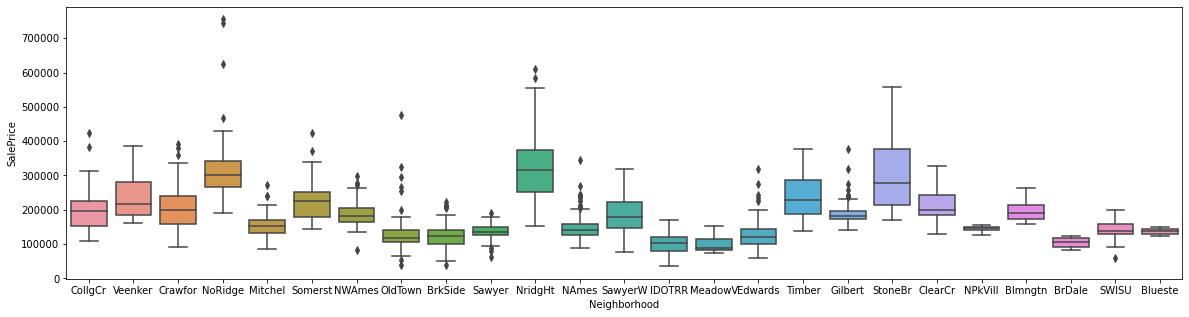

In [3710]:
plt.figure(figsize=(20,5))
sns.boxplot(x='Neighborhood', y='SalePrice', data=data);

We can see that there is a higher range in pricing for some of the higher priced neighborhoods

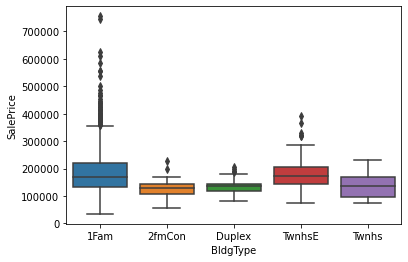

In [3711]:
sns.boxplot(x='BldgType', y='SalePrice', data=data);

Single Family Homes, represented as 1Fam, have the highest range of sale prices.

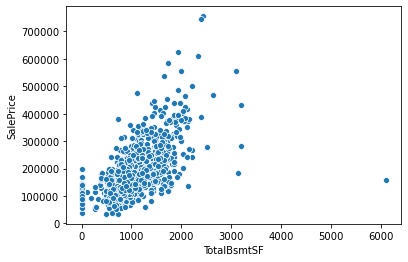

In [3712]:
sns.scatterplot(x='TotalBsmtSF', y='SalePrice', data=data);

Total basement square footage also appears positively correlated with sales price.

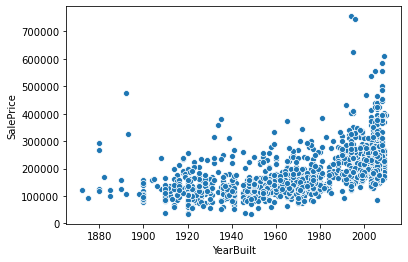

In [3713]:
sns.scatterplot(x='YearBuilt', y='SalePrice', data=data);

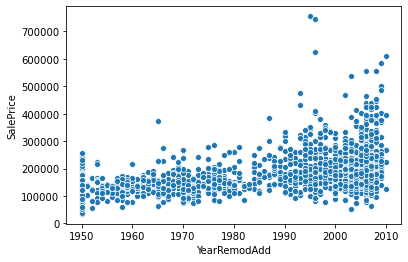

In [3714]:
sns.scatterplot(x='YearRemodAdd', y='SalePrice', data=data);

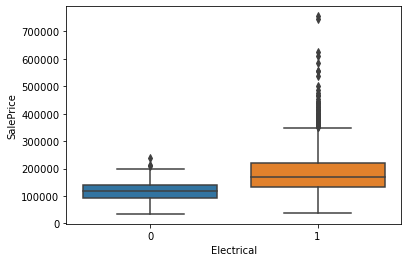

In [3715]:
sns.boxplot(x='Electrical', y='SalePrice', data=data);

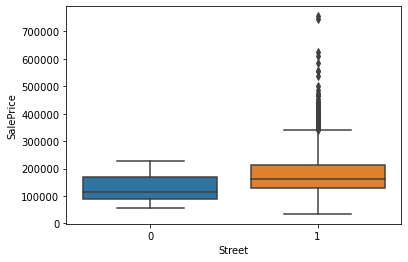

In [3716]:
sns.boxplot(x='Street', y='SalePrice', data=data);

### Baseline Model
Based on domain knowledge and the features that seemed to highly correlate with sale price, we will use the following features for our baseline model
1) Neighorhood
2) GrLivArea
3) OverallQual
4) LotArea
5) YearRemodAdd
6) BldgType
7) TotalBsmtSF

In [3717]:
# Convert neighborhood to categorical
neighborhood_cat = pd.get_dummies(data.Neighborhood, prefix='neigh')
data2 = pd.concat([data, pd.get_dummies(data['Neighborhood'], prefix='neigh', drop_first=True)], axis=1)
data2.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_IDOTRR,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker
0,60,RL,65.0,8450,1,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,4,3,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,1,856,854,0,1710,1.0,0.0,2,1,3,1,4,8,Typ,0,Attchd,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,2,2008,WD,Normal,208500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,20,RL,80.0,9600,1,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,3,3,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,1,1262,0,0,1262,0.0,1.0,2,0,3,1,3,6,Typ,1,Attchd,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,5,2007,WD,Normal,181500.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
2,60,RL,68.0,11250,1,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,4,3,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,1,920,866,0,1786,1.0,0.0,2,1,3,1,4,6,Typ,1,Attchd,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,9,2008,WD,Normal,223500.0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,70,RL,60.0,9550,1,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,3,3,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,1,961,756,0,1717,1.0,0.0,1,0,3,1,4,7,Typ,1,Detchd,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,2,2006,WD,Abnorml,140000.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,60,RL,84.0,14260,1,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,4,3,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,1,1145,1053,0,2198,1.0,0.0,2,1,4,1,4,9,Typ,1,Attchd,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,12,2008,WD,Normal,250000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


In [3718]:
# Convert BldgType to categorical
data2 = pd.concat([data2, pd.get_dummies(data2['BldgType'], prefix='BldgType', drop_first=True)], axis=1)

In [3719]:
# Train test split
# Separate X and y
X = data2[['neigh_Blueste', 'neigh_BrDale', 'neigh_BrkSide', 'neigh_ClearCr', 
          'neigh_CollgCr', 'neigh_Crawfor', 'neigh_Edwards', 'neigh_Gilbert', 'neigh_IDOTRR', 'neigh_MeadowV',
          'neigh_Mitchel', 'neigh_NAmes', 'neigh_NoRidge', 'neigh_NridgHt', 'neigh_OldTown', 'neigh_SWISU', 'neigh_Sawyer', 'neigh_SawyerW', 'neigh_Somerst', 
          'neigh_StoneBr', 'neigh_Timber', 'neigh_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 
          'BldgType_Twnhs', 'BldgType_TwnhsE','GrLivArea', 'OverallQual', 'LotArea', 'YearRemodAdd', 'TotalBsmtSF']]
y = data2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3720]:
# Linear Regression Baseline Model
model_one = LinearRegression()
print('Model got an average score of R2: {}'.format(
    cross_val_score(model_one, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.785349215663297


In [3721]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

33558.005673593776

In [3722]:
# Random Forest Regressor Baseline Model
rf = RandomForestRegressor()
print('Model got an average score of R2: {}'.format(
    cross_val_score(rf, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.8099939820596106


In [3723]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

27675.86164109

In [3724]:
# Gradient Boosted Regressor Baseline Model
gbr = GradientBoostingRegressor()
print('Model got an average score of R2: {}'.format(
    cross_val_score(gbr, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.828388174761965


In [3725]:
# RMSE- GBR
gbr_mod = GradientBoostingRegressor().fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

26070.61436322901

In [3726]:
# Linear Regression MAE
actual_array = np.asarray(y_test)
pred = pd.DataFrame(data = y_pred, columns = ['Predicted'])
actual = pd.DataFrame(data = actual_array, columns = ['Actual'])
pred_actual = pd.concat([pred, actual], axis=1)
pred_actual['Error'] = abs(pred_actual['Predicted'] - pred_actual['Actual'])
pred_actual['Error'].mean()

21070.371605216988

In [3727]:
# GBR MAE
actual_array = np.asarray(y_test)
pred = pd.DataFrame(data = gbr_y_pred, columns = ['Predicted'])
actual = pd.DataFrame(data = actual_array, columns = ['Actual'])
pred_actual = pd.concat([pred, actual], axis=1)
pred_actual['Error'] = abs(pred_actual['Predicted'] - pred_actual['Actual'])
pred_actual['Error'].mean()

17589.77270539649

In [3728]:
# Lasso Baseline Model
lasso = Lasso(alpha=0.1, normalize=True)
print('Model got an average score of R2: {}'.format(
    cross_val_score(lasso, X_train, y_train, cv=10).mean()))

Model got an average score of R2: 0.7853594198221129


In [3729]:
# RMSE- Lasso
clf = Lasso(alpha=0.1, normalize=True).fit(X_train, y_train)
lasso_pred = clf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_pred, squared=False)

33558.27234772411

In [3730]:
# RMSE - Ridge
rid = Ridge(normalize=True).fit(X_train, y_train)
rid_pred = rid.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rid_pred, squared=False)

41590.9660387998

#### Plot Residuals of Baseline Plots

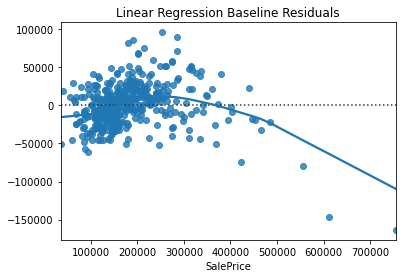

In [3731]:
sns.residplot(y_test, y_pred, lowess=True)
plt.title('Linear Regression Baseline Residuals');

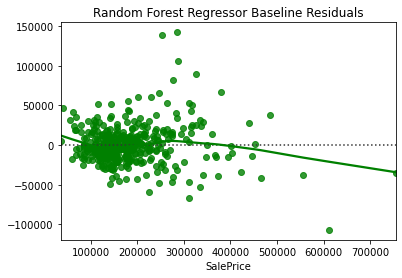

In [3732]:
sns.residplot(y_test, rf_y_pred, lowess=True, color='g')
plt.title('Random Forest Regressor Baseline Residuals');

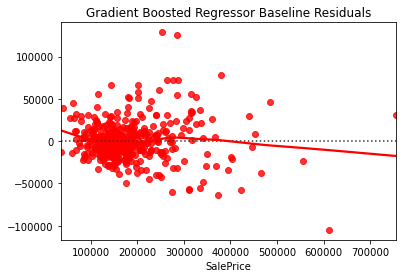

In [3733]:
sns.residplot(y_test, gbr_y_pred, lowess=True, color='r')
plt.title('Gradient Boosted Regressor Baseline Residuals');

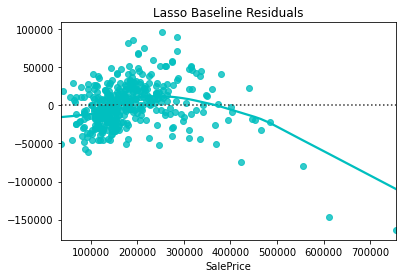

In [3734]:
sns.residplot(y_test, lasso_pred, lowess=True, color='c')
plt.title('Lasso Baseline Residuals');

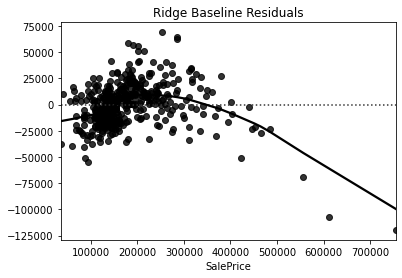

In [3735]:
sns.residplot(y_test, rid_pred, lowess=True, color='k')
plt.title('Ridge Baseline Residuals');

#### Explore outliers
Based on the residual plots we are going to explore properties with sales prices > $500,000

In [3736]:
pd.set_option('display.max_columns', None)
data2[data2.SalePrice > 500000]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MoSold,YrSold,SaleType,SaleCondition,SalePrice,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_IDOTRR,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE
178,20,RL,63.0,17423,1,IR1,Lvl,AllPub,CulDSac,Gtl,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,5,3,PConc,Ex,TA,No,GLQ,1904.0,Unf,0.0,312.0,2216.0,GasA,Ex,Y,1,2234,0,0,2234,1.0,0.0,2,0,1,1,5,9,Typ,1,Attchd,Fin,3.0,1166.0,TA,TA,Y,0,60,0,0,0,7,2009,New,Partial,501837.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
440,20,RL,105.0,15431,1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,5,3,PConc,Ex,TA,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,Ex,Y,1,2402,0,0,2402,1.0,0.0,2,0,2,1,5,10,Typ,2,Attchd,Fin,3.0,672.0,TA,TA,Y,0,72,0,0,170,4,2009,WD,Normal,555000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
691,60,RL,104.0,21535,1,IR1,Lvl,AllPub,Corner,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,6,1994,1995,Gable,WdShngl,HdBoard,HdBoard,BrkFace,1170.0,5,3,PConc,Ex,TA,Gd,GLQ,1455.0,Unf,0.0,989.0,2444.0,GasA,Ex,Y,1,2444,1872,0,4316,0.0,1.0,3,1,4,1,5,10,Typ,2,Attchd,Fin,3.0,832.0,TA,TA,Y,382,50,0,0,0,1,2007,WD,Normal,755000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
769,60,RL,47.0,53504,1,IR2,HLS,AllPub,CulDSac,Mod,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,5,3,PConc,Gd,TA,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,Ex,Y,1,1690,1589,0,3279,1.0,0.0,3,1,4,1,5,12,Mod,1,BuiltIn,Fin,3.0,841.0,TA,TA,Y,503,36,0,0,210,6,2010,WD,Normal,538000.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
803,60,RL,107.0,13891,1,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,2Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,424.0,5,3,PConc,Ex,TA,Gd,Unf,0.0,Unf,0.0,1734.0,1734.0,GasA,Ex,Y,1,1734,1088,0,2822,0.0,0.0,3,1,4,1,5,12,Typ,1,BuiltIn,RFn,3.0,1020.0,TA,TA,Y,52,170,0,0,192,1,2009,New,Partial,582933.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
898,20,RL,100.0,12919,1,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,5,3,PConc,Ex,TA,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,Ex,Y,1,2364,0,0,2364,1.0,0.0,2,1,2,1,5,11,Typ,2,Attchd,Fin,3.0,820.0,TA,TA,Y,0,67,0,0,0,3,2010,New,Partial,611657.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1046,60,RL,85.0,16056,1,IR1,Lvl,AllPub,Inside,Gtl,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,4,3,PConc,Ex,TA,Av,GLQ,240.0,Unf,0.0,1752.0,1992.0,GasA,Ex,Y,1,1992,876,0,2868,0.0,0.0,3,1,4,1,5,11,Typ,1,BuiltIn,Fin,3.0,716.0,TA,TA,Y,214,108,0,0,0,7,2006,New,Partial,556581.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1169,60,RL,118.0,35760,1,IR1,Lvl,AllPub,CulDSac,Gtl,NoRidge,Norm,Norm,1Fam,2Story,10,5,1995,1996,Hip,CompShg,HdBoard,HdBoard,BrkFace,1378.0,4,4,PConc,Ex,TA,Gd,GLQ,1387.0,Unf,0.0,543.0,1930.0,GasA,Ex,Y,1,1831,1796,0,3627,1.0,0.0,3,1,4,1,4,10,Typ,1,Attchd,Fin,3.0,

We can see that the 9 homes over $500,000 are in just three neighborhoods: StoneBr, NridgHt, and NoRidge. All homes are on the newer side and have been built/remodeled 1995 or later. They all have high quality basements (8 Ex and 1 has Gd) and BasmtCond = TA. All but 1 has a KitchenQual of 5 (the other is 4). 

Returning to the GrLivArea vs. SalePrice scatterplot, we can see that properties > 4,500 square feet don't follow a linear trend, so we will remove them

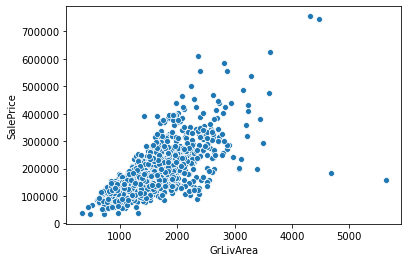

In [3737]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=data)

In [3738]:
data2[data2.GrLivArea > 4000]['SalePrice']

523     184750.0
691     755000.0
1182    745000.0
1298    160000.0
Name: SalePrice, dtype: float64

These four properties over 4,000 square feet have approximately average or below average sales prices or top of the line prices, leading us to believe that they are not representative of the overall data.

In [3739]:
# Delete homes > 4,500 sf
data2.drop([523, 691, 1182, 1298], inplace=True)

In [3740]:
data2['KitchenQual'].value_counts()

3    735
4    586
5     96
2     39
Name: KitchenQual, dtype: int64

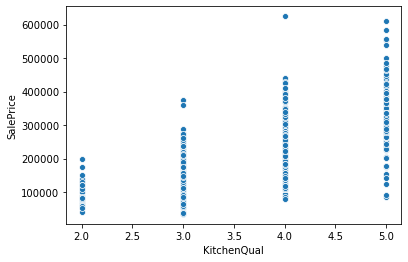

In [3741]:
sns.scatterplot(x='KitchenQual', y='SalePrice', data=data2)

### Feature Engineering
Now we will do some more feature engineering to improve our model

In [3742]:
# Combine full and half bathrooms
data2['Total_Bathrooms'] = data2['FullBath'] + data2['HalfBath']*.5

In [3743]:
# Drop full & half bathrooms
data2.drop(['FullBath'], axis=1, inplace=True)
data2.drop(['HalfBath'], axis=1, inplace=True)

In [3744]:
# Combine basement full and half bathrooms
data2['Basement_Total_Bathrooms'] = data2['BsmtFullBath'] + data2['BsmtHalfBath']*.5

In [3745]:
# Drop basement full & half bathrooms
data2.drop(['BsmtFullBath'], axis=1, inplace=True)
data2.drop(['BsmtHalfBath'], axis=1, inplace=True)

In [3746]:
# What percent of properties have been remodeled?
(data2['YearRemodAdd'] == data2['YearBuilt']).sum()/len(data)

0.5219178082191781

In [3747]:
# Create New Feature Subtracting Year Sold from Most Recent of Year Built or Remodeled
data2['Age_Of_Interior'] = data2['YrSold'].astype(int) - data2[["YearBuilt", "YearRemodAdd"]].max(axis=1)


### Models Round2
Removed YearRemodAdd and Added 'GarageCars', 'Age_Of_Interior', 'Basement_Total_Bathrooms', 'Total_Bathrooms'

In [3748]:
# Train test split
# Separate X and y
X = data2[['neigh_Blueste', 'neigh_BrDale', 'neigh_BrkSide', 'neigh_ClearCr', 
          'neigh_CollgCr', 'neigh_Crawfor', 'neigh_Edwards', 'neigh_Gilbert', 'neigh_IDOTRR', 'neigh_MeadowV',
          'neigh_Mitchel', 'neigh_NAmes', 'neigh_NoRidge', 'neigh_NridgHt', 'neigh_OldTown', 'neigh_SWISU', 'neigh_Sawyer', 'neigh_SawyerW', 'neigh_Somerst', 
          'neigh_StoneBr', 'neigh_Timber', 'neigh_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex', 
          'BldgType_Twnhs', 'BldgType_TwnhsE','GrLivArea', 'OverallQual', 'LotArea', 'TotalBsmtSF', 'GarageCars', 'Age_Of_Interior', 'Basement_Total_Bathrooms', 'Total_Bathrooms']]
y = data2['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3749]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

25897.25205854596

In [3750]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

24333.630025131937

In [3751]:
# RMSE- GBR
gbr_mod = GradientBoostingRegressor(learning_rate=0.13, n_estimators=200, max_depth = 3, min_samples_split = 45, min_samples_leaf = 2, random_state=42).fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

23721.822004602353

In [3752]:
# RMSE- Lasso
clf = Lasso(normalize=True).fit(X_train, y_train)
lasso_pred = clf.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_pred, squared=False)

25872.02457630051

In [3753]:
# RMSE- Ridge
rid = Ridge(normalize=True).fit(X_train, y_train)
rid_pred = rid.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rid_pred, squared=False)

28168.918897973865

### Get dummies for remaining categorical variables

In [3754]:
# Drop Neighborhood and BldgType (already turned into dummies)
data2.drop(['BldgType'], axis=1, inplace=True)
data2.drop(['Neighborhood'], axis=1, inplace=True)

In [3755]:
data2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 97 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   MSSubClass                1456 non-null   object 
 1   MSZoning                  1456 non-null   object 
 2   LotFrontage               1456 non-null   float64
 3   LotArea                   1456 non-null   int64  
 4   Street                    1456 non-null   int64  
 5   LotShape                  1456 non-null   object 
 6   LandContour               1456 non-null   object 
 7   Utilities                 1456 non-null   object 
 8   LotConfig                 1456 non-null   object 
 9   LandSlope                 1456 non-null   object 
 10  Condition1                1456 non-null   object 
 11  Condition2                1456 non-null   object 
 12  HouseStyle                1456 non-null   object 
 13  OverallQual               1456 non-null   int64  
 14  OverallC

In [3756]:
# MSSubClass
data3 = pd.concat([data2, pd.get_dummies(data2['MSSubClass'], prefix='MSSubClass', drop_first=True)], axis=1)
# MSZoning
data4 = pd.concat([data3, pd.get_dummies(data2['MSZoning'], prefix='MSZoning', drop_first=True)], axis=1)
# LotShape
data6 = pd.concat([data4, pd.get_dummies(data2['LotShape'], prefix='LotShape', drop_first=True)], axis=1)
# LandContour
data7 = pd.concat([data6, pd.get_dummies(data2['LandContour'], prefix='LandContour', drop_first=True)], axis=1)
# Utilities
data8 = pd.concat([data7, pd.get_dummies(data2['Utilities'], prefix='Utilities', drop_first=True)], axis=1)
# LotConfig
data9 = pd.concat([data8, pd.get_dummies(data2['LotConfig'], prefix='LotConfig', drop_first=True)], axis=1)
# LandSlope
data10 = pd.concat([data9, pd.get_dummies(data2['LandSlope'], prefix='LandSlope', drop_first=True)], axis=1)
# Condition1
data11 = pd.concat([data10, pd.get_dummies(data2['Condition1'], prefix='Condition1', drop_first=True)], axis=1)
# Condition2
data12 = pd.concat([data11, pd.get_dummies(data2['Condition2'], prefix='Condition2', drop_first=True)], axis=1)
# HouseStyle
data13 = pd.concat([data12, pd.get_dummies(data2['HouseStyle'], prefix='HouseStyle', drop_first=True)], axis=1)
# RoofStyle
data14 = pd.concat([data13, pd.get_dummies(data2['RoofStyle'], prefix='RoofStyle', drop_first=True)], axis=1)
# RoofMatl
data15 = pd.concat([data14, pd.get_dummies(data2['RoofMatl'], prefix='RoofMatl', drop_first=True)], axis=1)
# Exterior1st
data16 = pd.concat([data15, pd.get_dummies(data2['Exterior1st'], prefix='Exterior1st', drop_first=True)], axis=1)
# Exterior2nd
data17 = pd.concat([data16, pd.get_dummies(data2['Exterior2nd'], prefix='Exterior2nd', drop_first=True)], axis=1)
# MasVnrType
data18 = pd.concat([data17, pd.get_dummies(data2['MasVnrType'], prefix='MasVnrType', drop_first=True)], axis=1)
# ExterQual
data19 = pd.concat([data18, pd.get_dummies(data2['ExterQual'], prefix='ExterQual', drop_first=True)], axis=1)
# ExterCond
data20 = pd.concat([data19, pd.get_dummies(data2['ExterCond'], prefix='ExterCond', drop_first=True)], axis=1)
# Foundation
data21 = pd.concat([data20, pd.get_dummies(data2['Foundation'], prefix='Foundation', drop_first=True)], axis=1)
# BsmtQual
data22 = pd.concat([data21, pd.get_dummies(data2['BsmtQual'], prefix='BsmtQual', drop_first=True)], axis=1)
# BsmtCond
data23 = pd.concat([data22, pd.get_dummies(data2['BsmtCond'], prefix='BsmtCond', drop_first=True)], axis=1)
# BsmtExposure
data24= pd.concat([data23, pd.get_dummies(data2['BsmtExposure'], prefix='BsmtExposure', drop_first=True)], axis=1)
# BsmtFinType1
data25 = pd.concat([data24, pd.get_dummies(data2['BsmtFinType1'], prefix='BsmtFinType1', drop_first=True)], axis=1)
# BsmtFinType2
data26 = pd.concat([data25, pd.get_dummies(data2['BsmtFinType2'], prefix='BsmtFinType2', drop_first=True)], axis=1)
# Heating
data27 = pd.concat([data26, pd.get_dummies(data2['Heating'], prefix='Heating', drop_first=True)], axis=1)
# HeatingQC
data28 = pd.concat([data27, pd.get_dummies(data2['HeatingQC'], prefix='HeatingQC', drop_first=True)], axis=1)
# CentralAir
data29 = pd.concat([data28, pd.get_dummies(data2['CentralAir'], prefix='CentralAir', drop_first=True)], axis=1)
# KitchenQual
data30 = pd.concat([data29, pd.get_dummies(data2['KitchenQual'], prefix='KitchenQual', drop_first=True)], axis=1)
# Functional
data31 = pd.concat([data30, pd.get_dummies(data2['Functional'], prefix='Functional', drop_first=True)], axis=1)
# GarageType
data32 = pd.concat([data31, pd.get_dummies(data2['GarageType'], prefix='GarageType', drop_first=True)], axis=1)
# GarageFinish
data33 = pd.concat([data32, pd.get_dummies(data2['GarageFinish'], prefix='GarageFinish', drop_first=True)], axis=1)
# GarageQual
data34 = pd.concat([data33, pd.get_dummies(data2['GarageQual'], prefix='GarageQual', drop_first=True)], axis=1)
# GarageCond
data35 = pd.concat([data34, pd.get_dummies(data2['GarageCond'], prefix='GarageCond', drop_first=True)], axis=1)
# PavedDrive
data36 = pd.concat([data35, pd.get_dummies(data2['PavedDrive'], prefix='PavedDrive', drop_first=True)], axis=1)
# MoSold
data37 = pd.concat([data36, pd.get_dummies(data2['MoSold'], prefix='MoSold', drop_first=True)], axis=1)
# YrSold
data38 = pd.concat([data37, pd.get_dummies(data2['YrSold'], prefix='YrSold', drop_first=True)], axis=1)
# SaleType
data39 = pd.concat([data38, pd.get_dummies(data2['SaleType'], prefix='SaleType', drop_first=True)], axis=1)
# SaleCondition
data40 = pd.concat([data39, pd.get_dummies(data2['SaleCondition'], prefix='SaleCondition', drop_first=True)], axis=1)


In [3757]:
data40.drop(['LandContour'], axis=1, inplace=True)
data40.drop(['Utilities'], axis=1, inplace=True)
data40.drop(['LandSlope'], axis=1, inplace=True)
data40.drop(['ExterCond'], axis=1, inplace=True)
data40.drop(['MSSubClass'], axis=1, inplace=True)
data40.drop(['MSZoning'], axis=1, inplace=True)
data40.drop(['LotShape'], axis=1, inplace=True)
data40.drop(['LotConfig'], axis=1, inplace=True)
data40.drop(['Condition1'], axis=1, inplace=True)
data40.drop(['Condition2'], axis=1, inplace=True)
data40.drop(['HouseStyle'], axis=1, inplace=True)
data40.drop(['RoofStyle'], axis=1, inplace=True)
data40.drop(['RoofMatl'], axis=1, inplace=True)
data40.drop(['Exterior1st'], axis=1, inplace=True)
data40.drop(['Exterior2nd'], axis=1, inplace=True)
data40.drop(['MasVnrType'], axis=1, inplace=True)

data40.drop(['ExterQual'], axis=1, inplace=True)
data40.drop(['Foundation'], axis=1, inplace=True)
data40.drop(['BsmtQual'], axis=1, inplace=True)
data40.drop(['BsmtCond'], axis=1, inplace=True)
data40.drop(['BsmtExposure'], axis=1, inplace=True)
data40.drop(['BsmtFinType1'], axis=1, inplace=True)
data40.drop(['BsmtFinType2'], axis=1, inplace=True)
data40.drop(['Heating'], axis=1, inplace=True)
data40.drop(['HeatingQC'], axis=1, inplace=True)
data40.drop(['CentralAir'], axis=1, inplace=True)
data40.drop(['KitchenQual'], axis=1, inplace=True)
data40.drop(['Functional'], axis=1, inplace=True)
data40.drop(['GarageType'], axis=1, inplace=True)
data40.drop(['GarageFinish'], axis=1, inplace=True)
data40.drop(['GarageQual'], axis=1, inplace=True)
data40.drop(['GarageCond'], axis=1, inplace=True)
data40.drop(['PavedDrive'], axis=1, inplace=True)

data40.drop(['MoSold'], axis=1, inplace=True)
data40.drop(['YrSold'], axis=1, inplace=True)
data40.drop(['SaleType'], axis=1, inplace=True)
data40.drop(['SaleCondition'], axis=1, inplace=True)

data40.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 260 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   LotFrontage               float64
 1   LotArea                   int64  
 2   Street                    int64  
 3   OverallQual               int64  
 4   OverallCond               int64  
 5   YearBuilt                 int64  
 6   YearRemodAdd              int64  
 7   MasVnrArea                float64
 8   BsmtFinSF1                float64
 9   BsmtFinSF2                float64
 10  BsmtUnfSF                 float64
 11  TotalBsmtSF               float64
 12  Electrical                int64  
 13  1stFlrSF                  int64  
 14  2ndFlrSF                  int64  
 15  LowQualFinSF              int64  
 16  GrLivArea                 int64  
 17  BedroomAbvGr              int64  
 18  KitchenAbvGr              int64  
 19  TotRmsAbvGrd              int64  
 20  Fireplaces                int

### Model Round 3: All cat variables converted to dummy

In [3758]:
data40.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 260 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   LotFrontage               float64
 1   LotArea                   int64  
 2   Street                    int64  
 3   OverallQual               int64  
 4   OverallCond               int64  
 5   YearBuilt                 int64  
 6   YearRemodAdd              int64  
 7   MasVnrArea                float64
 8   BsmtFinSF1                float64
 9   BsmtFinSF2                float64
 10  BsmtUnfSF                 float64
 11  TotalBsmtSF               float64
 12  Electrical                int64  
 13  1stFlrSF                  int64  
 14  2ndFlrSF                  int64  
 15  LowQualFinSF              int64  
 16  GrLivArea                 int64  
 17  BedroomAbvGr              int64  
 18  KitchenAbvGr              int64  
 19  TotRmsAbvGrd              int64  
 20  Fireplaces                int

In [3759]:
X = data40.drop(['SalePrice'], axis=1)
y = data40['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3760]:
# RMSE- Linear Reg
lin_mod = LinearRegression().fit(X_train,y_train)
y_pred = lin_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)

24485.044688787297

In [3761]:
# RMSE- RF
rf_mod = RandomForestRegressor().fit(X_train,y_train)
rf_y_pred = rf_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, rf_y_pred, squared=False)

21965.471854750333

In [3762]:
# RMSE- GBR - using GridSearch hypterparameters
gbr_mod = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=4, subsample=0.5, random_state=1 ).fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

19343.325916883303

In [3775]:
np.mean(np.abs((y_test - gbr_y_pred) / y_test)) * 100

8.358996083119594

Text(0.5, 1.0, 'Feature Importance')

<Figure size 864x432 with 0 Axes>

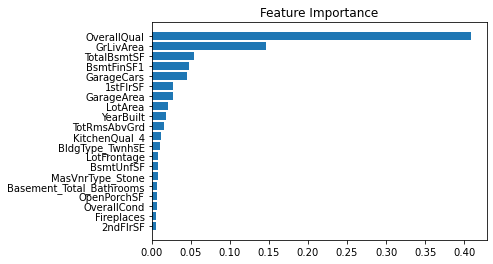

In [3763]:
from sklearn.inspection import permutation_importance
feature_importance = gbr_mod.feature_importances_
sorted_idx = np.argsort(feature_importance)[-20:]
pos = np.arange(sorted_idx.shape[0]) + .5
fig = plt.figure(figsize=(12, 6))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, data40.columns[sorted_idx])
plt.title('Feature Importance')



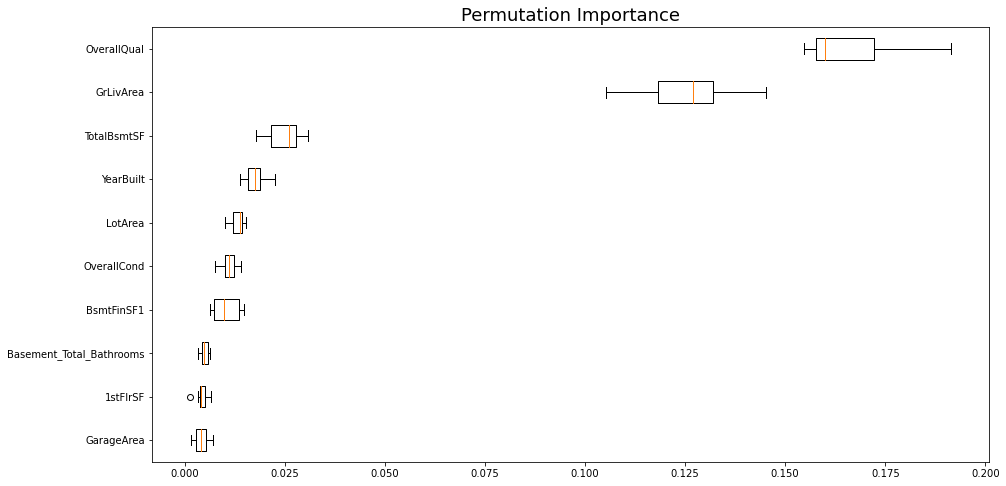

In [3768]:
plt.figure(figsize=(15,8))
result = permutation_importance(gbr_mod, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()[-10:]
plt.boxplot(result.importances[sorted_idx].T, labels=data40.columns[sorted_idx],
            vert=False)
plt.title("Permutation Importance", size=18)
plt.show()

In [3599]:
result.importances_mean.max()

0.16549013937501617

In [3594]:
data40.columns

Index(['LotFrontage', 'LotArea', 'Street', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=260)

In [3532]:
# GBR MAE
actual_array = np.asarray(y_test)
pred = pd.DataFrame(data = gbr_y_pred, columns = ['Predicted'])
actual = pd.DataFrame(data = actual_array, columns = ['Actual'])
pred_actual = pd.concat([pred, actual], axis=1)
pred_actual['Error'] = abs(pred_actual['Predicted'] - pred_actual['Actual'])
pred_actual['Error'].mean()

In [3535]:
#MAE


13283.264770448459

In [3536]:
#RMSE - square root of average of squared differences
np.sqrt((pred_actual['Error']**2).mean())

19343.325916883292

In [3552]:
search_grid={'n_estimators':[1000,3000, 4000],'learning_rate':[.001,0.01,.1],'max_depth':[1,2,4,6],'subsample':[.5,.75,1],'random_state':[1]}
search=GridSearchCV(estimator=gbr_mod,param_grid=search_grid,scoring='neg_root_mean_squared_error',n_jobs=1)

In [3553]:
search.fit(X,y)
search.best_params_

KeyboardInterrupt: 

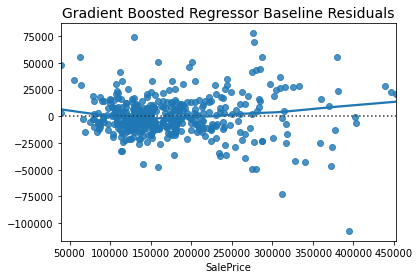

In [3544]:
# Look at Residuals again
sns.residplot(y_test, gbr_y_pred, lowess=True)
plt.title('Gradient Boosted Regressor Baseline Residuals', size=14);

In [3539]:
# Look at outliers in plot
data40.sort_values(by=['SalePrice'], ascending=False)

,LotFrontage,LotArea,Street,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,SalePrice,neigh_Blueste,neigh_BrDale,neigh_BrkSide,neigh_ClearCr,neigh_CollgCr,neigh_Crawfor,neigh_Edwards,neigh_Gilbert,neigh_IDOTRR,neigh_MeadowV,neigh_Mitchel,neigh_NAmes,neigh_NPkVill,neigh_NWAmes,neigh_NoRidge,neigh_NridgHt,neigh_OldTown,neigh_SWISU,neigh_Sawyer,neigh_SawyerW,neigh_Somerst,neigh_StoneBr,neigh_Timber,neigh_Veenker,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,Total_Bathrooms,Basement_Total_Bathrooms,Age_Of_Interior,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,Utilities_NoSeWa,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_3,ExterQual_4,ExterQual_5,ExterCond_2,ExterCond_3,ExterCond_4,ExterCond_5,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,CentralAir_Y,KitchenQual_3,KitchenQual_4,KitchenQual_5,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,MoSold_10,MoSold_11,MoSold_12,MoSold_2,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,YrSold_2007,YrSold_2008,YrSold_2009,YrSold_2010,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1169,118.0,35760,1,10,5,1995,1996,1378.0,1387.0,0.0,543.0,1930.0,1,1831,1796,0,3627,4,1,10,1,3.0,807.0,361,76,0,0,0,6250

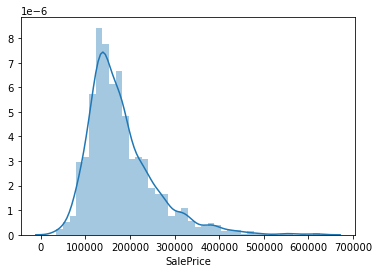

In [3538]:
sns.distplot(data40['SalePrice']);

In [3113]:
reg = LassoCV(normalize=True)
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 16.561599
Best score using built-in LassoCV: 0.925657


In [3114]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 106 variables and eliminated the other 153 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

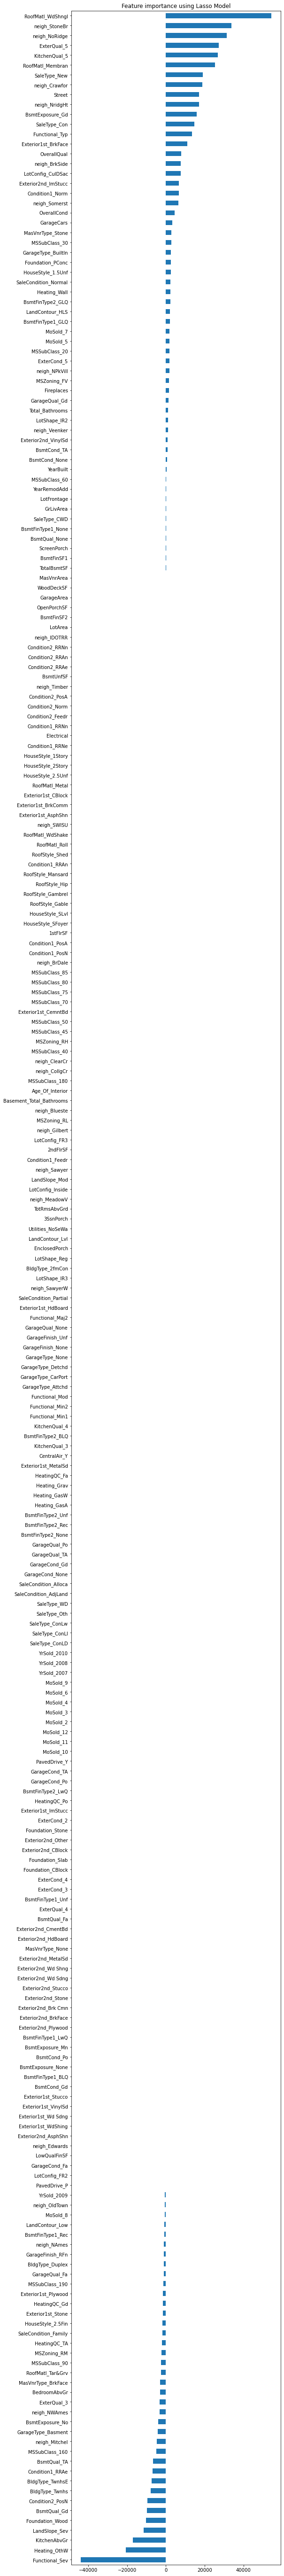

In [3115]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [3116]:
ridge = RidgeCV(normalize=True)
ridge.fit(X, y)
print("Best alpha using built-in RidgeCV: %f" % ridge.alpha_)
print("Best score using built-in RidgeCV: %f" %ridge.score(X,y))
coef = pd.Series(ridge.coef_, index = X.columns)

Best alpha using built-in RidgeCV: 0.100000
Best score using built-in RidgeCV: 0.932849


Text(0.5, 1.0, 'Feature Importance using Ridge Model')

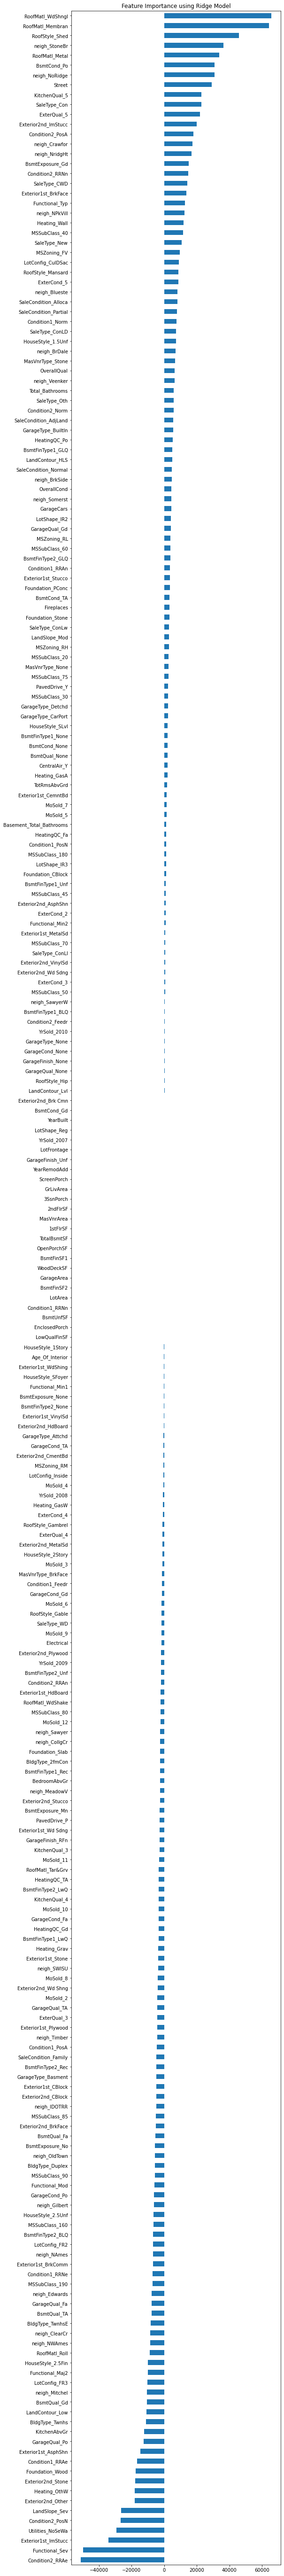

In [3117]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 100.0)
imp_coef.plot(kind = "barh")
plt.title("Feature Importance using Ridge Model")

Now we need to explore why the Ridge model states three roof variables as having the highest positive feature importance.

In [3118]:
data41['RoofMatl_Membran'].value_counts()

0    1455
1       1
Name: RoofMatl_Membran, dtype: int64

In [3125]:
# RMSE- Lasso using best alpha
lasso_mod = Lasso(alpha=16.56, tol=0.008, normalize=True).fit(X_train,y_train)
lasso_y_pred = lasso_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, lasso_y_pred, squared=False)

24216.158370052442

In [2873]:
# RMSE- Ridge using best alpha
ridge_mod = Ridge(alpha=0.1, normalize=True).fit(X_train,y_train)
ridge_y_pred = ridge_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, ridge_y_pred, squared=False)

25858.109176827627

#### Residuals for final model


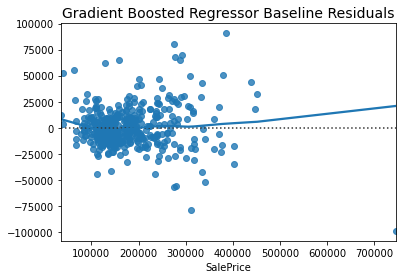

In [3263]:
sns.residplot(y_test, gbr_y_pred, lowess=True)
plt.title('Gradient Boosted Regressor Baseline Residuals', size=14);

### Model 4
Our best model so far is one with domain knowledge based feature selection.

In [2771]:
data41.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 264 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   LotFrontage               float64
 1   LotArea                   int64  
 2   OverallQual               int64  
 3   OverallCond               int64  
 4   YearBuilt                 int64  
 5   YearRemodAdd              int64  
 6   MasVnrArea                float64
 7   BsmtFinSF1                float64
 8   BsmtFinSF2                float64
 9   BsmtUnfSF                 float64
 10  TotalBsmtSF               float64
 11  Electrical                object 
 12  1stFlrSF                  int64  
 13  2ndFlrSF                  int64  
 14  LowQualFinSF              int64  
 15  GrLivArea                 int64  
 16  BedroomAbvGr              int64  
 17  KitchenAbvGr              int64  
 18  TotRmsAbvGrd              int64  
 19  Fireplaces                int64  
 20  GarageCars                flo

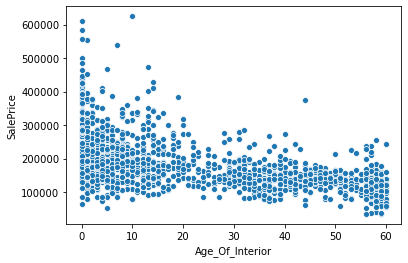

In [2240]:
import matplotlib.pyplot as plt
%matplotlib inline
sns.scatterplot(x='Age_Of_Interior', y='SalePrice', data=data2)


In [2244]:
data['Street'].value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [3602]:
# MODEL 4
X = data40[['OverallQual', 'YearBuilt', 'TotalBsmtSF', 'GrLivArea', 'GarageCars', 'neigh_CollgCr', 'neigh_Somerst', 'BsmtFinSF1', 'LotArea', 'Basement_Total_Bathrooms', '1stFlrSF']]
y = data40['SalePrice']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [3577]:
data40.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1456 entries, 0 to 1459
Data columns (total 260 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   LotFrontage               float64
 1   LotArea                   int64  
 2   Street                    int64  
 3   OverallQual               int64  
 4   OverallCond               int64  
 5   YearBuilt                 int64  
 6   YearRemodAdd              int64  
 7   MasVnrArea                float64
 8   BsmtFinSF1                float64
 9   BsmtFinSF2                float64
 10  BsmtUnfSF                 float64
 11  TotalBsmtSF               float64
 12  Electrical                int64  
 13  1stFlrSF                  int64  
 14  2ndFlrSF                  int64  
 15  LowQualFinSF              int64  
 16  GrLivArea                 int64  
 17  BedroomAbvGr              int64  
 18  KitchenAbvGr              int64  
 19  TotRmsAbvGrd              int64  
 20  Fireplaces                int

In [3603]:
# RMSE- GBR - using GridSearch hypterparameters
gbr_mod = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.01, max_depth=4, subsample=0.5, random_state=1 ).fit(X_train,y_train)
gbr_y_pred = gbr_mod.predict(X_test)
sklearn.metrics.mean_squared_error(y_test, gbr_y_pred, squared=False)

23903.745308251393